# Activity Recognition using Machine Learning

In this project, I take the activity recognition dataset. The dataset includes sensor readings of 30 different individuals and the type of activity they were recorded for. Here, I'll use the dataset from Kaggle to classify various activities.

## Import libraries

Let's start by first importing all the necessary libraries. I import `numpy` and `pandas` for managing arrays and dataset. Then, matplotlib in included to be used to create visualisations. To use various machine learning algorithms, I import SVM, Logistic Regression, K Nearest Neighbors Classifier and Random Forest Classifier from sklearn. Also, included is `accuracy_score` to calculate accuracy.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## Understand dataset

I first import the dataset using the pandas method `read_csv` into `training_data` and `testing_data`.

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

Next, I analyse the dataset shape to see the number of features and the total dataset records. Also, I check if there are any null values.

In [3]:
# For training data
print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))

# For testing data
print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

Training Data: (7352, 563)
Null values present in training data: False
Testing Data: (2947, 563)
Null values present in testing data: False


There are total 7352 records in the training dataset that we can use. Further, there are no null values in the dataset. This is fortunate and thus, we need not write code to handle null values.
The testing dataset has 2947 records for testing our models. This dataset has no null values.
Next, I check the top 5 rows of train_data using the method `head(5)`.

In [4]:
training_data.head(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X    ...     \
0         -0.923527         -0.934724    ...      
1         -0.957686         -0.943068    ...      
2         -0.977469         -0.938692    ...      
3         -0.989302         -0.938692    ...      
4         -0.990441         -0.942469    ...      

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  
0              0.179941             -0.058627        1  STANDING  
1              0.180289             -0.054317        1  STANDING  
2              0.180637             -0.049118        1  STANDING  
3              0.181935             -0.047663        1  STANDING  
4              0.185151             -0.043892        1  STANDING  

[5 rows x 563 columns]

From the output above, I can see that there are set of accelerometer and gyroscope sensor values for each record. Further, the last two columns are `subject` which refers to subject number and `Activity` which defines the type of activity. `subject` is of no use to us, so I can drop it safely. The `Activity` column acts as the label `y` and all the rest columns are features `X`. We thus calculate the features and labels for both training and testing data.

In [5]:
# Get X and y for training data
y_train = training_data['Activity']
X_train = training_data.drop(columns = ['Activity', 'subject'])

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

## Visualize the dataset

We will now visualise the training data to get a better understanding of the available dataset. We begin by visualizing the percentage of data for each type of activity.

([<matplotlib.patches.Wedge at 0x1a15275cc0>,
 [Text(0.907106,0.62222,'LAYING'),
  Text(-0.238746,1.07378,'SITTING'),
  Text(-1.07459,0.235074,'STANDING'),
  Text(-0.719313,-0.832219,'WALKING'),
  Text(0.293016,-1.06026,'WALKING_DOWNSTAIRS'),
  Text(1.0038,-0.449871,'WALKING_UPSTAIRS')],
 [Text(0.494785,0.339393,'19.14'),
  Text(-0.130225,0.585697,'18.69'),
  Text(-0.586139,0.128222,'17.49'),
  Text(-0.392352,-0.453938,'16.68'),
  Text(0.159827,-0.578321,'14.59'),
  Text(0.547528,-0.245384,'13.41')])

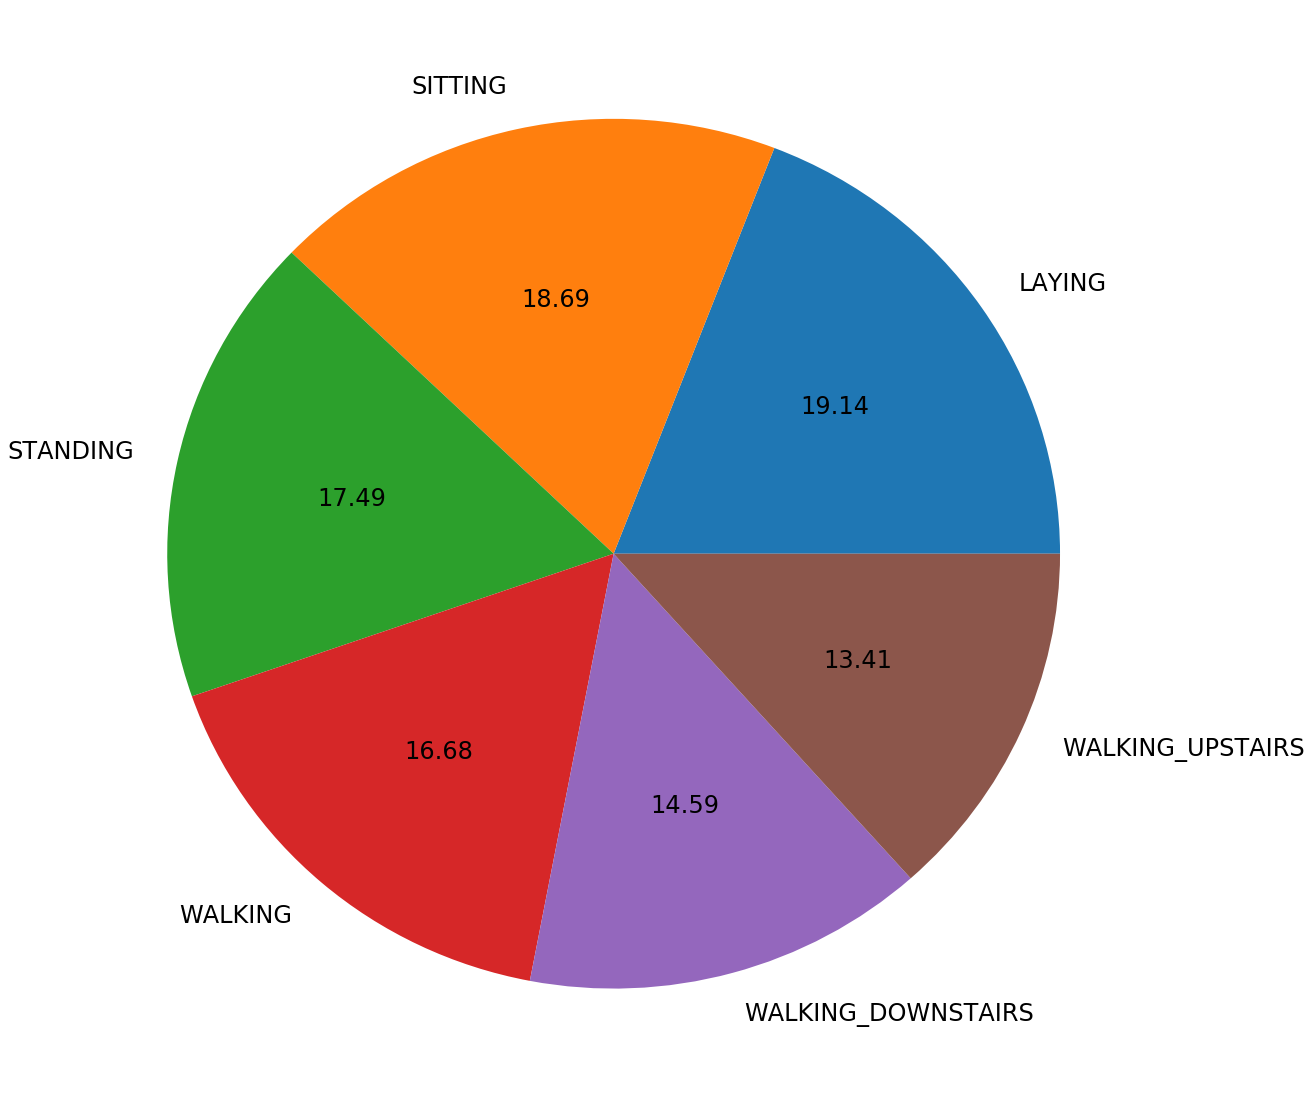

In [6]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

The percenage values show that the data size for each activity is comparable. The dataset is equally distributed and will prevent bias.

Next, on inspecting the dataset, we can see that there are many features. It's easy to identify that there are  Accelerometer, Gyroscope and some other values in the dataset. We can check the share of each by plotting a bar graph of each type. Accelerometer values have `Acc` in them, Gyroscope values have `Gyro` and rest can be considered as others.

<BarContainer object of 3 artists>

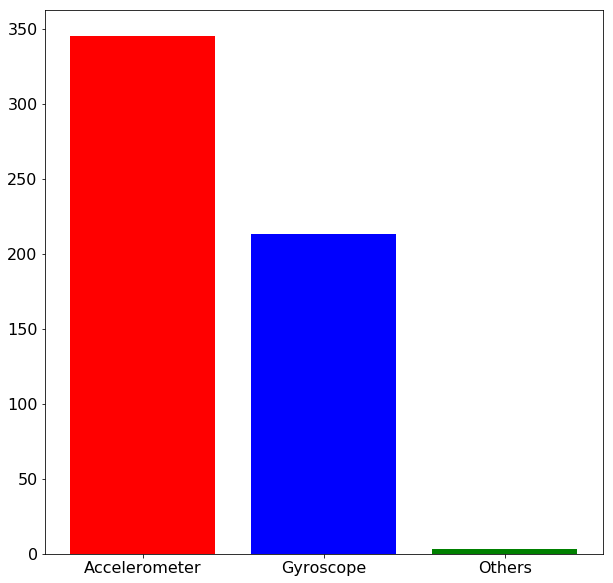

In [7]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))

Accelerometer constitutes the maximum features, followed by Gyroscope. Other features are very less.

### Inspect a particular activity closely

Let's take the example of Standing. We select all rows which have the activity as `STANDING`. The dataset values are recorded as time series. So, we can add time series for each subject. We can then plot their movement as a line graph with X axis as time and Y axis as any specific feature, for example `angle(X,gravityMean)`.

In [8]:
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)

# Set time series for each subject
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

For each subject, we can now plot the graph of their angles with time. We use the `cm` subpackage of `matplotlib` to get a set of colors which shall be used for differentiating subjects.

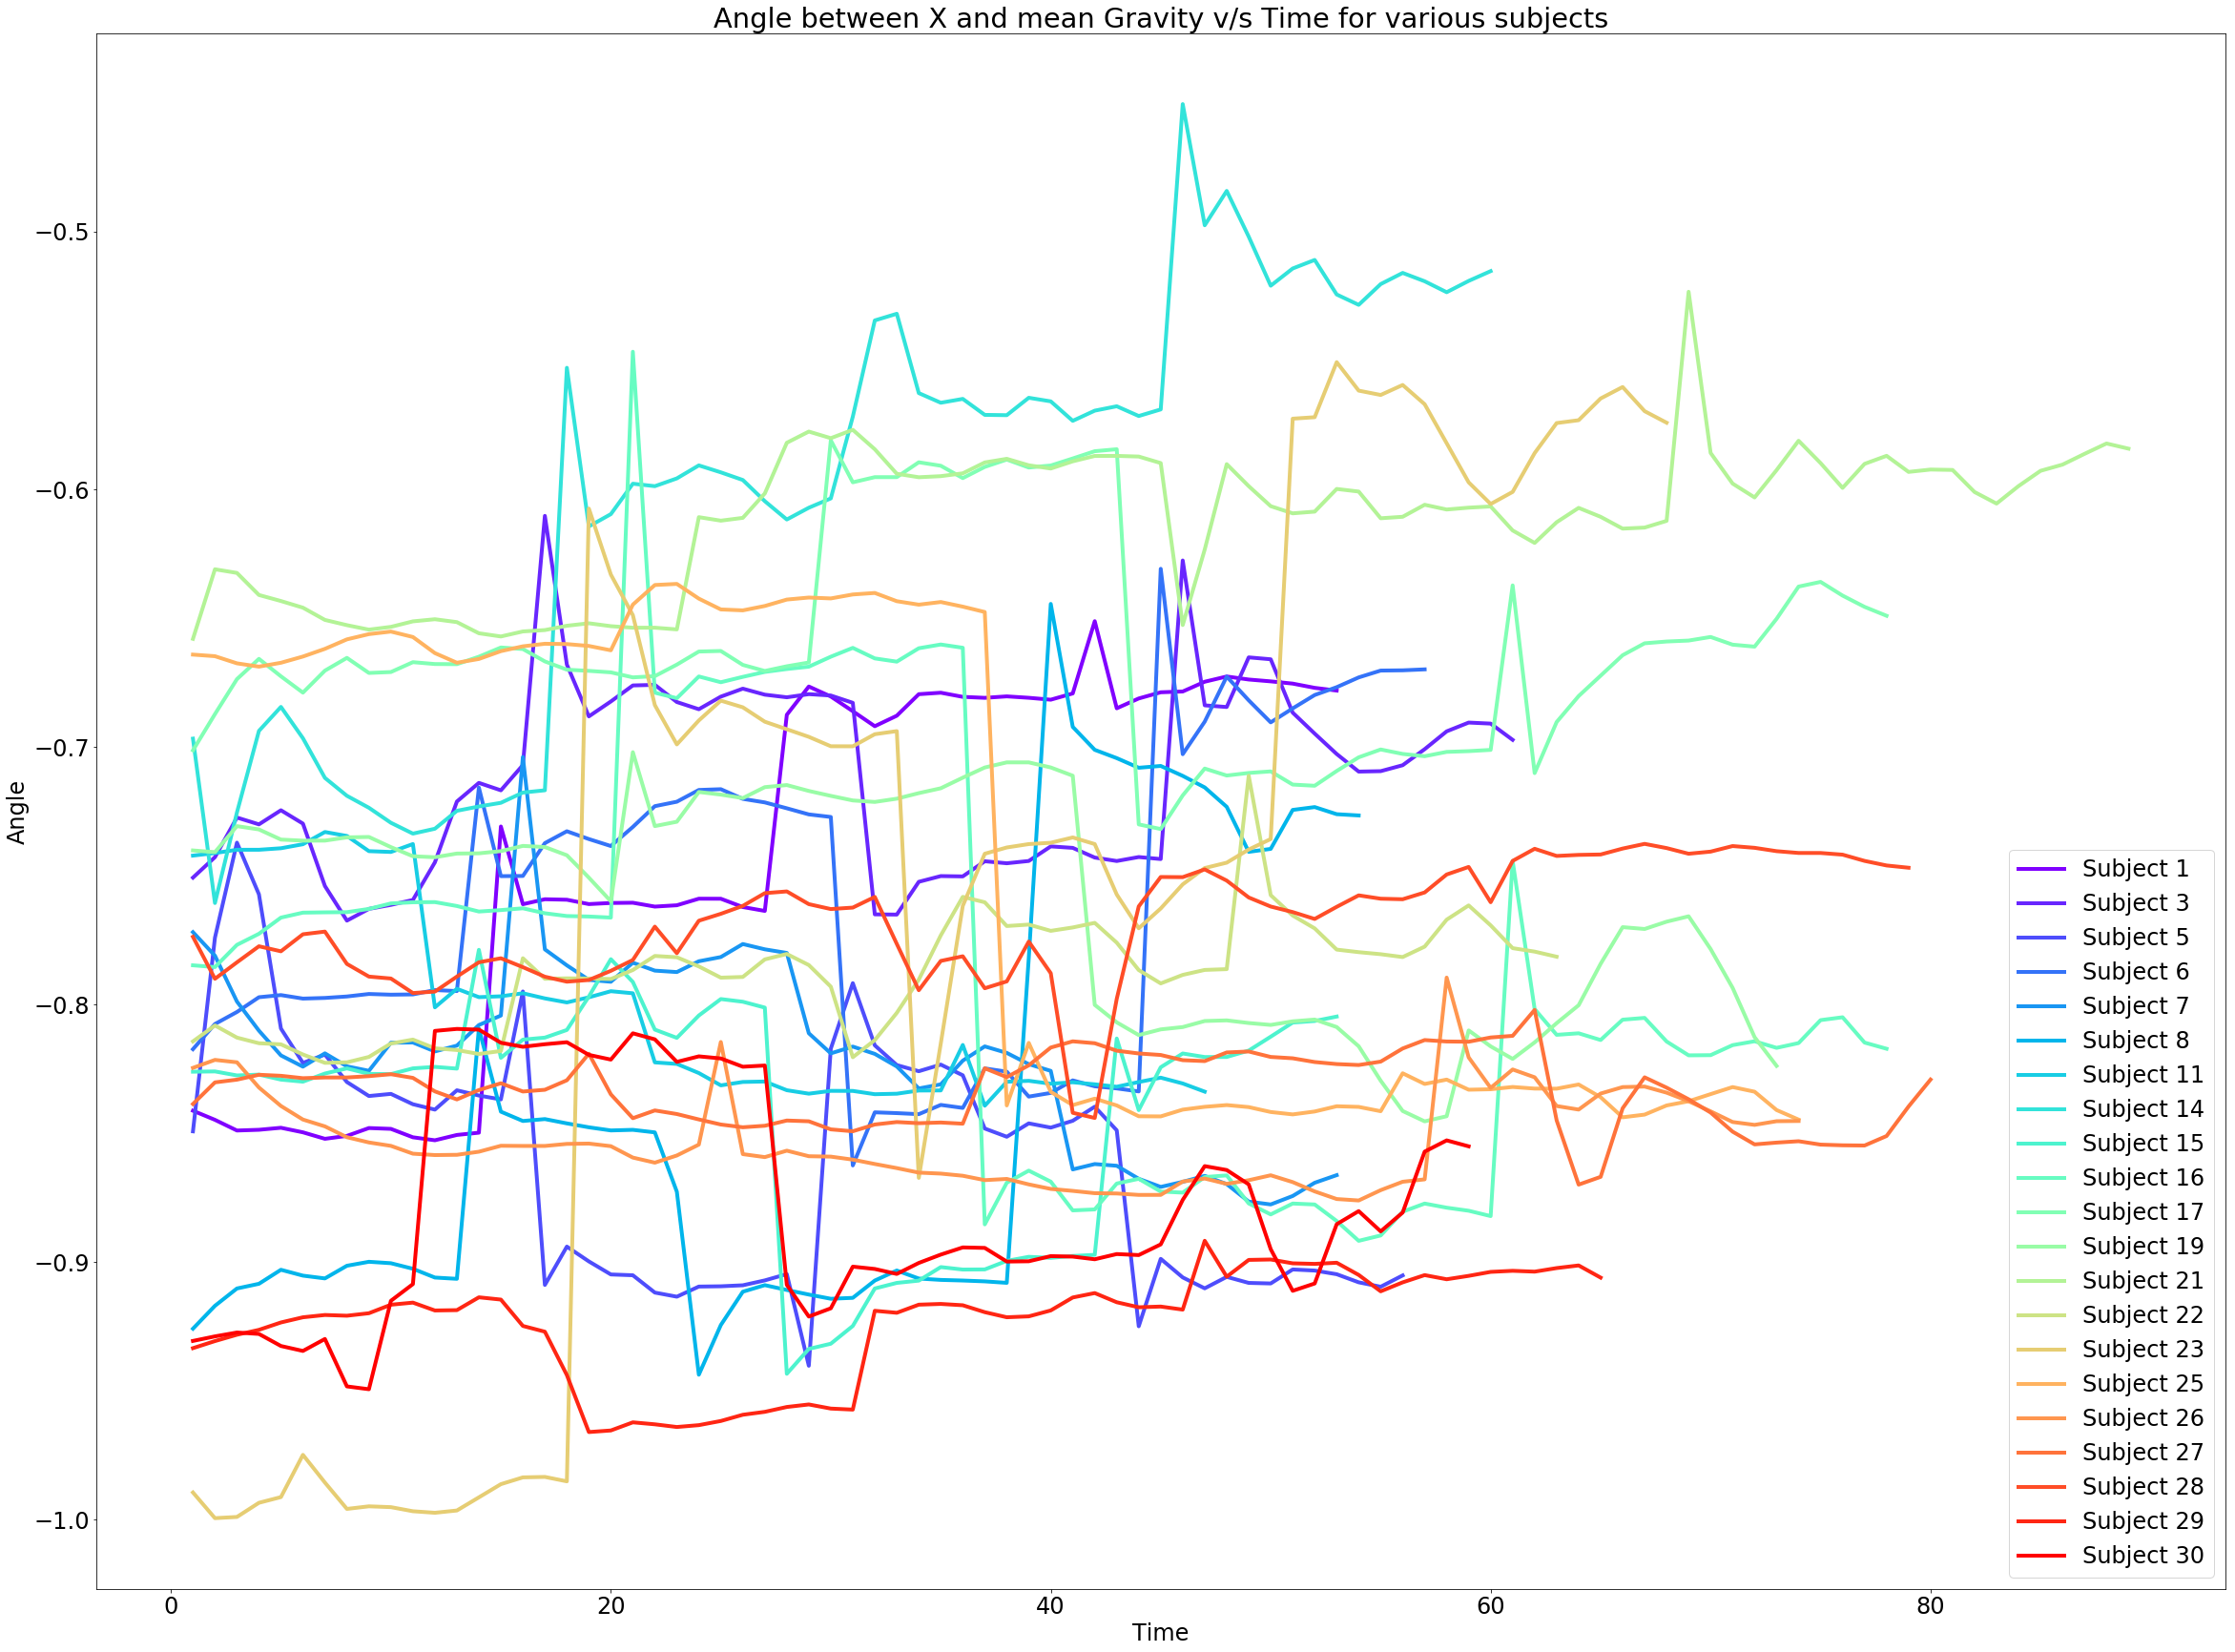

In [9]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

Similarly, we can inspect other features as well and check their progress with time.

## Classify activities

To begin, I'll use various machine learning algorithms available inside the sklearn package that I have already imported. For each algorithm, I'll calculate the accuracy of prediction and identify the most accurate algorithm.

For now, I will keep the default values of parameters as defined in `sklearn` for each classifier.

In [10]:
accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Support Vector Classifier accuracy: 94.02782490668477%
Logistic Regression accuracy: 96.19952494061758%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 89.68442483881914%


We can plot a bar graph of the accuracies to compare them visually.

Text(0.5,1,'Accuracy of various algorithms')

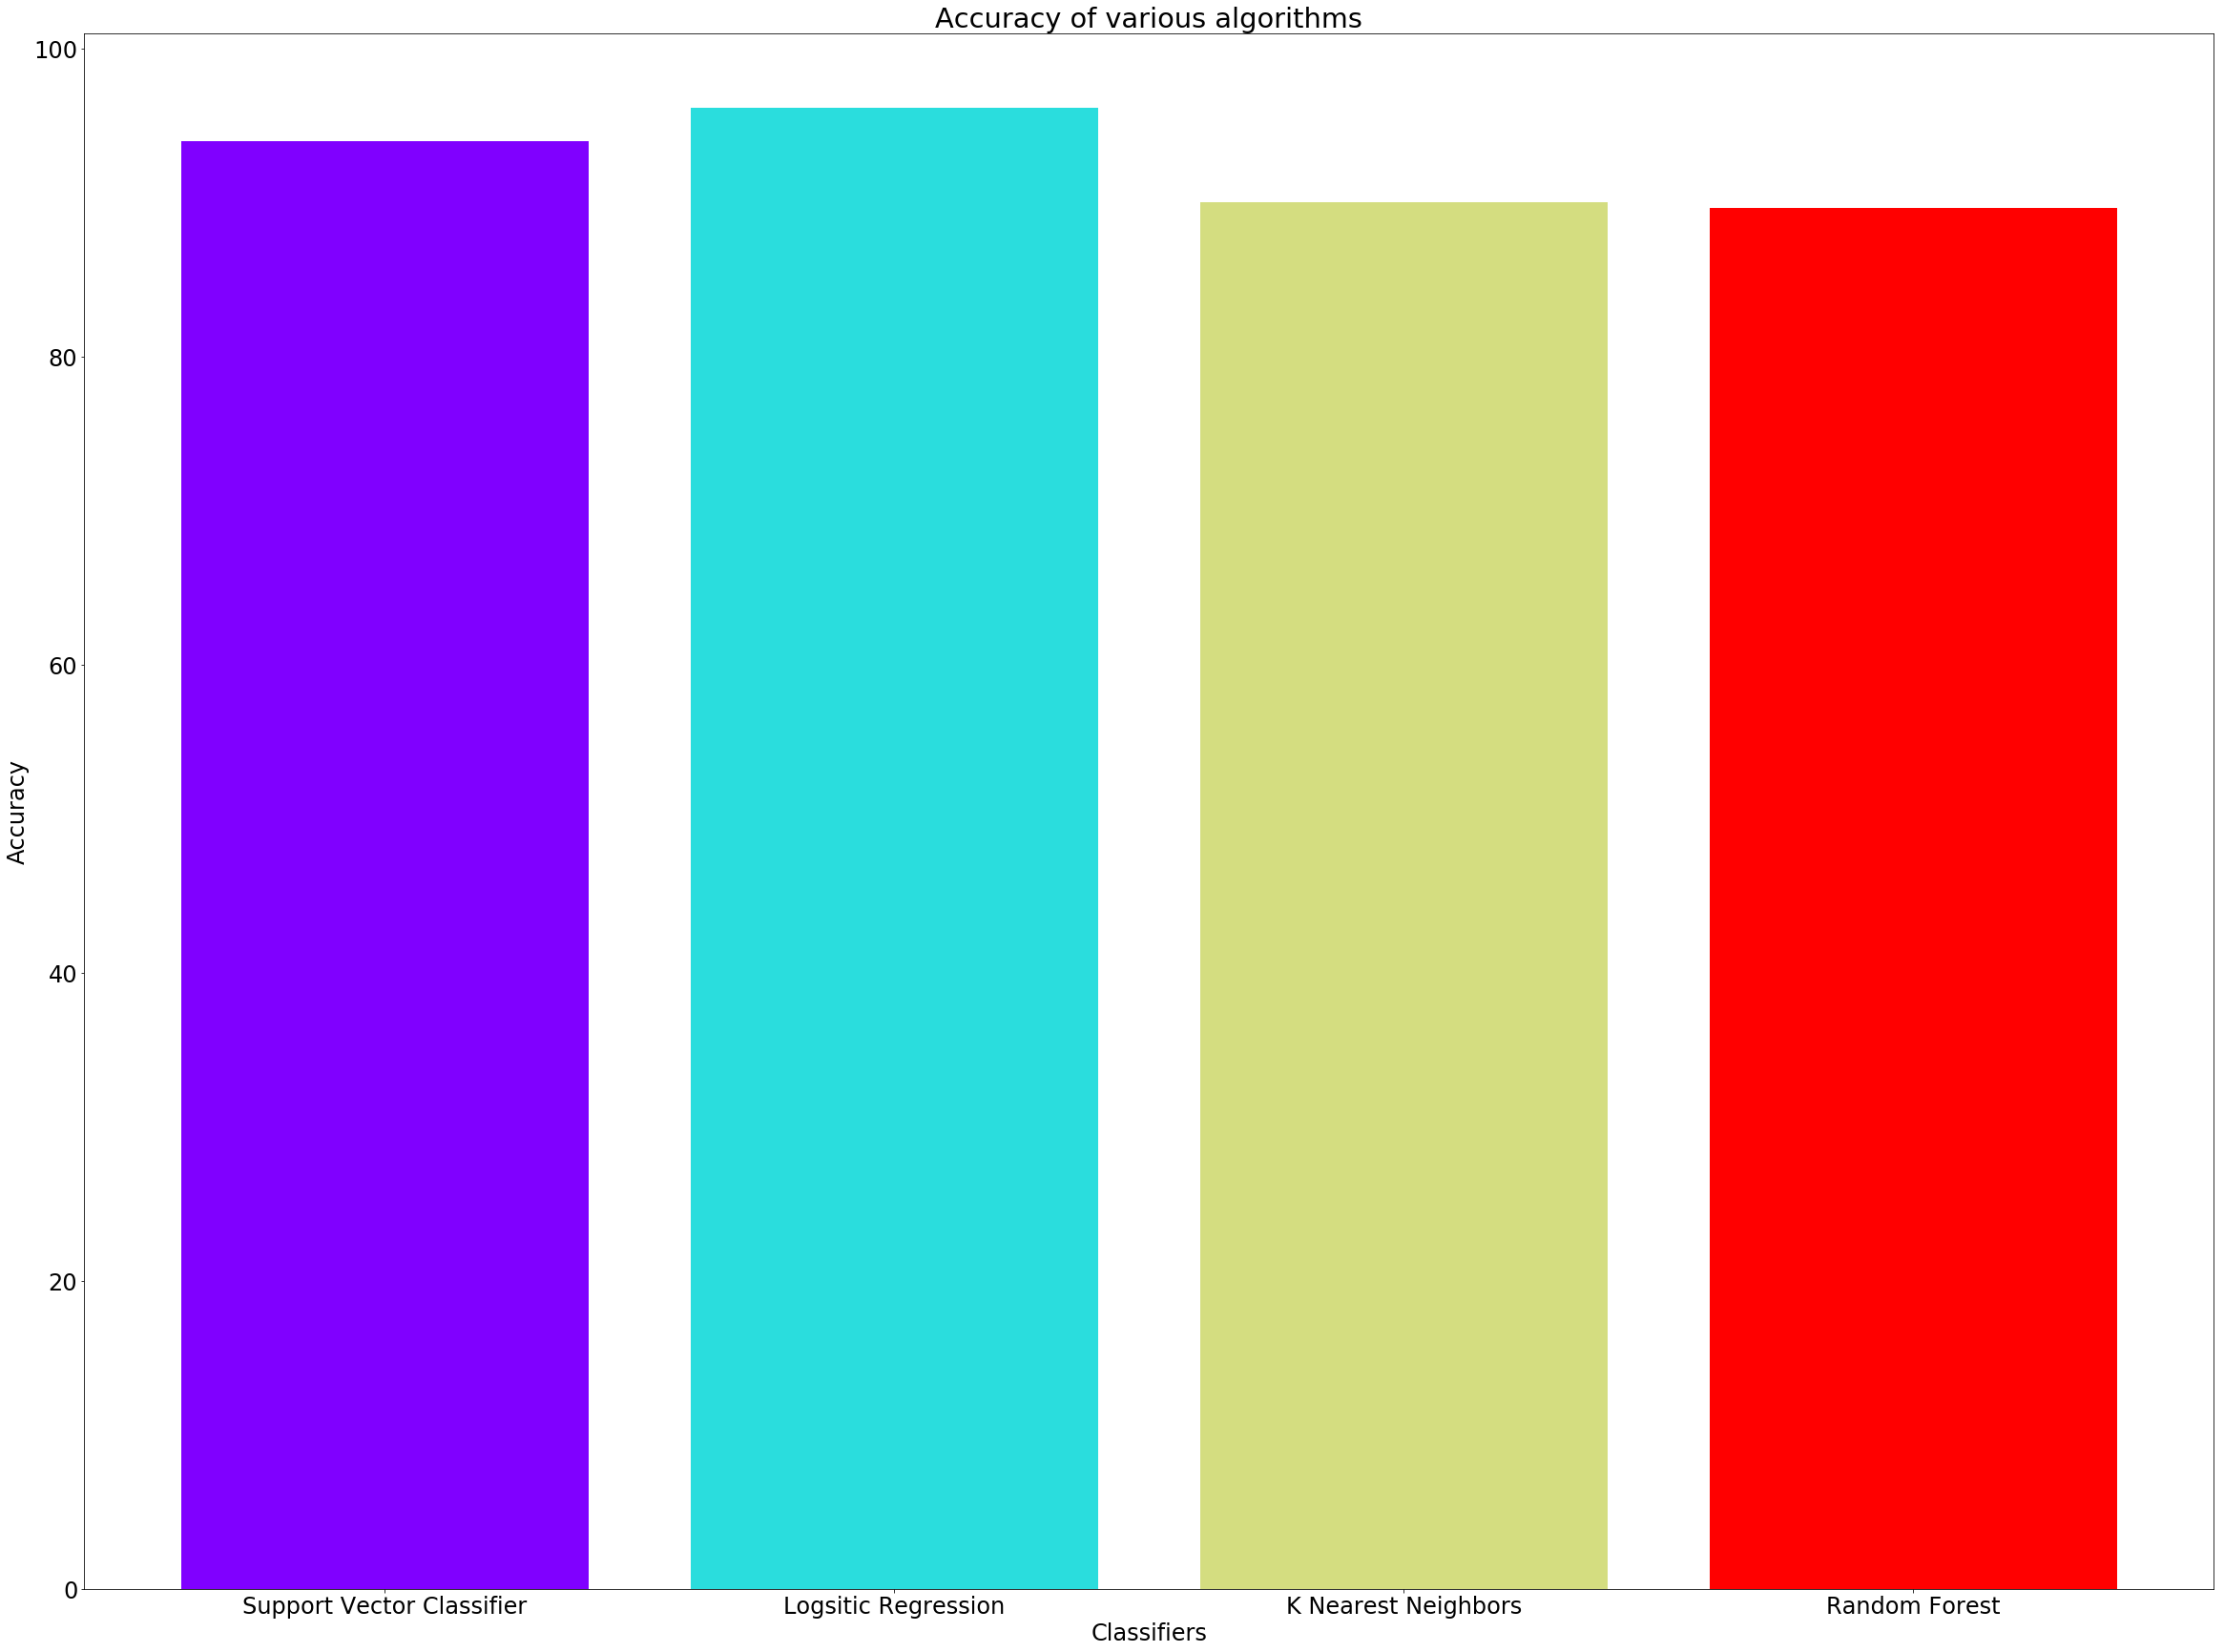

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

We can clearly see that `Logistic Regression` performed the best with the highest accuracy.

## Conclusion

In this particular project, I explored the activity recognition dataset. I visualized the data using matplotlib. Then, I applied numerous machine learning algorithms and found out that `Logistic Regression` performed the best in classifying different activities.